# Introduction to computer programming: Lab 3

In [43]:
import numpy as np
import matplotlib.pyplot as ppt

## File I/O

### Exercise 1.1

Write the integers 0 to 100,000 to a file called 'myintegers.txt'.

In [44]:
filename = 'myintegers.txt'

file = open(filename, 'w')

n = 100000 # another way of writing 100 million

for i in range(0,n + 1):  # remember to go one past n
    file.write(str(i))
    file.write('\n')

file.close()

### Exercise 1.2

Now write the integers from 100,000 to 0 to the same file appending the data to the end.

In [45]:
filename = 'myintegers.txt'

file = open(filename, 'a')

n = 100000 # another way of writing 100 million

for i in range(n, -1, -1):  
    file.write(str(i))
    file.write('\n')

file.close()

### Exercise 2.1

I have provided you with a file ('beam_data.txt') that provides input data for some simple beam analysis. You can assume the beam is simply supported with a u.d.l. imposed and consist of a solid rectangular section. The order of the data is:
* the length L (m) of the beam
* the imposed u.d.l. (kN/m)
* the breadth b of the beam (m)
* the depth d of the beam (m)
* Young's Modulus for the section (N/m2)
* the yield stress (N/m2)

Read the data in from the file and set appropriate variables equal to the length, udl etc.

In [46]:
filename = 'beam_data.txt'

beamfile = open(filename, 'r')

mydata = []

for line in beamfile:
    mydata.append(float(line))

L = mydata[0]
w = mydata[1] * 1e3
b = mydata[2]
d = mydata[3]
E = mydata[4]
sigma_y = mydata[5]

print('L={}m, udl={}N/m, b={}m, d={}m, E={}Pa, sigma_y = {}Pa'.format(L, w, b, d, E, sigma_y))

beamfile.close()

L=12.0m, udl=2000.0N/m, b=0.15m, d=0.2m, E=200000000000.0Pa, sigma_y = 220000000.0Pa


### Exercise 2.2

Now write some code that plots the bending moment diagram of the beam for the inputs given by the file. 

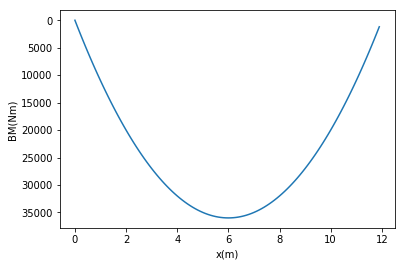

In [47]:
def bendingMoment(x):
    return w * L / 2 * x - w * x * x * 0.5

xvals = np.arange(0.0, L, 0.1)
yvals = bendingMoment(xvals)

ppt.plot(xvals, yvals)
ppt.gca().invert_yaxis()   # Some nifty code to reverse the y-axis
ppt.xlabel('x(m)')
ppt.ylabel('BM(Nm)')
ppt.show()

### Exercise 2.3

Now write some code the outputs the maximum bending stress in the beam and outputs whether the beam has yielded or not.

In [48]:
I = b * d**3 / 12.0 # The second moment of area. This is a constant and hence not an function input

def bendingStress(M,y):
    return M*y / I

xvals = np.arange(0.0, L, 0.01)
bm_vals = bendingMoment(xvals)
stress_vals = bendingStress(bm_vals, d * 0.5)   # Compute bending stresses along the beam for the outermost fibre (y=d/2)

maxstress = np.max(stress_vals)
print('The maximum bending stress is {:.2f}MPa'.format(maxstress / 1.0e6))

if maxstress < sigma_y:
    print('Beam has not yielded')
else:
    print('Beam has yielded')

The maximum bending stress is 36.00MPa
Beam has not yielded


### Exercise 3.1

Write a 10x10 matrix of random values. You can try and use the np.random.rand() function if you wish.  Add one to the top left and bottom right entries and the compute the inverse (making sure to check this is correct).

In [49]:
A = np.random.rand(10,10)
A[0,0] += 1
A[9,9] += 1

A_inv = np.linalg.inv(A)
print(A_inv)

[[ -2.68060362   6.93409595  -5.91144512   8.69185489  -1.06651518
   -1.8325246   -2.16619423   1.4370456   -0.66449298   1.50152539]
 [ -0.70177127   0.8623604    1.42699384  -1.42196011  -0.41274888
    0.34180417  -0.40843678   0.87678336  -0.04191076  -0.68307822]
 [ -0.16483338  -0.51462041   0.68412651  -1.88047841  -0.95499247
    1.57866382   0.24533172   0.68523789   0.69961154  -0.72370621]
 [  3.23737465  -6.14541187   4.11835862  -6.46075915   2.59268928
   -0.70703085   0.78064398  -0.31899198   0.13509781  -0.14685175]
 [  1.89313252  -3.54670089   4.40321912  -6.26574747   0.44737963
   -0.01398751   0.57199355  -0.68849778   1.70816403  -0.84242331]
 [  1.0528636   -0.84413858   1.18897036  -1.39818608   0.29217093
    0.60439119   0.34261579  -1.26568904   0.27790697  -0.75594402]
 [  1.25760346  -5.089154     4.81490718  -6.15698238   0.06283097
    1.73372053   0.57202571  -0.23059677   0.98200334  -0.75319229]
 [  1.68619797  -5.51248228   4.77202265  -6.05833783  

### Exercise 3.2

Using the matrix you defined above, create a column vector of size 10 and populate this with random value. Assuming the matrix is called $\mathbf{A}$ and the newly created column vector is $\mathbf{b}$, solve $\mathbf{Ax = b}$

In [50]:
b = np.random.rand(10,1)
print(b)

x = np.linalg.solve(A,b)

# YOu need to note that the random.rand() function generates a numpy array, not a matrix. To convert it, do this....
Amatrix = np.matrix(A)
print(Amatrix * x)

[[ 0.22043502]
 [ 0.82220447]
 [ 0.35060093]
 [ 0.9778733 ]
 [ 0.804576  ]
 [ 0.40045658]
 [ 0.87286279]
 [ 0.87042323]
 [ 0.803972  ]
 [ 0.89648393]]
[[ 0.22043502]
 [ 0.82220447]
 [ 0.35060093]
 [ 0.9778733 ]
 [ 0.804576  ]
 [ 0.40045658]
 [ 0.87286279]
 [ 0.87042323]
 [ 0.803972  ]
 [ 0.89648393]]


### Exercise 4.1

The function $a(t) = e^{-0.1t}\sin(2t)$ determines the acceleration of a structure where t is the time in seconds. Plot the behaviour of this structure up to t=100s and also produce a file output of the acceleration data with a sensible step size.  

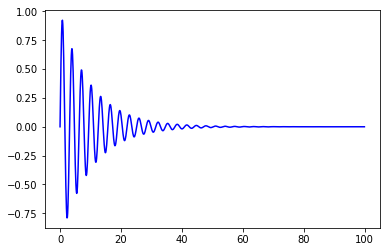

In [51]:
def acceleration(t):
    return np.exp(-0.1 * t) * np.sin(2.0 * t)

stepsize = 0.1
xvals = np.arange(0.0, 100.0, stepsize)
yvals = acceleration(xvals)

ppt.plot(xvals, yvals, 'b-')
ppt.show()

filename = 'acceleration.txt'
file = open(filename, 'w')

for val in yvals:
    file.write(str(val))
    file.write('\n')
    
file.close()


### Exercise 4.2 (difficult)

Using the same function as in exercise 4.1, determine the values of t at which the **magnitude** of the acceleration is greater than 0.25. 

In [52]:
# Let's use a small step size to be more accurate
stepsize = 0.1

time_vals = np.arange(0.0, 100.0, stepsize)  # Time values between 0 to 100
acc_vals = acceleration(xvals)                # Associated accelerations

max_acc = 0.25

# list of time values at which acceleration is greater than 0.25
time_list = []

for t,a in zip(time_vals, acc_vals):
    
    if abs(a) >= max_acc:
        time_list.append(t)
    
print(time_list)


[0.20000000000000001, 0.30000000000000004, 0.40000000000000002, 0.5, 0.60000000000000009, 0.70000000000000007, 0.80000000000000004, 0.90000000000000002, 1.0, 1.1000000000000001, 1.2000000000000002, 1.3, 1.4000000000000001, 1.8, 1.9000000000000001, 2.0, 2.1000000000000001, 2.2000000000000002, 2.3000000000000003, 2.4000000000000004, 2.5, 2.6000000000000001, 2.7000000000000002, 2.8000000000000003, 2.9000000000000004, 3.4000000000000004, 3.5, 3.6000000000000001, 3.7000000000000002, 3.8000000000000003, 3.9000000000000004, 4.0, 4.1000000000000005, 4.2000000000000002, 4.2999999999999998, 4.4000000000000004, 4.5, 5.0, 5.1000000000000005, 5.2000000000000002, 5.3000000000000007, 5.4000000000000004, 5.5, 5.6000000000000005, 5.7000000000000002, 5.8000000000000007, 5.9000000000000004, 6.0, 6.6000000000000005, 6.7000000000000002, 6.8000000000000007, 6.9000000000000004, 7.0, 7.1000000000000005, 7.2000000000000002, 7.3000000000000007, 7.4000000000000004, 7.5, 8.2000000000000011, 8.3000000000000007, 8.